# Gaussian Distribution generation

In [43]:
import numpy as np
from typing import List, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from matplotlib.patches import Ellipse

## Sample Data

In [44]:
def generate_2d_gaussian_oracles(N_oracles, N_failing_oracles, mu, sigma):
    oracles = [
        (np.array(np.random.normal(mu, sigma)), True)
        if i >= N_failing_oracles 
        else (np.array([
            np.random.uniform(mu[0], sigma[0]*5),
            np.random.uniform(mu[1], sigma[1]*5) 
            ]), False)
        for i in range(N_oracles)
    ]

    np.random.shuffle(oracles)
    
    values, validity = zip(*oracles)

    return np.array(values), np.array(validity)

In [45]:
N_oracles = 20
failing_percentage = 0.2
N_failing_oracles = round(N_oracles * failing_percentage)

In [46]:
mu = [20, 12]
sigma = [3, 2]

oracles_2d, true_oracles_2d = generate_2d_gaussian_oracles(
    N_oracles, N_failing_oracles, mu, sigma)

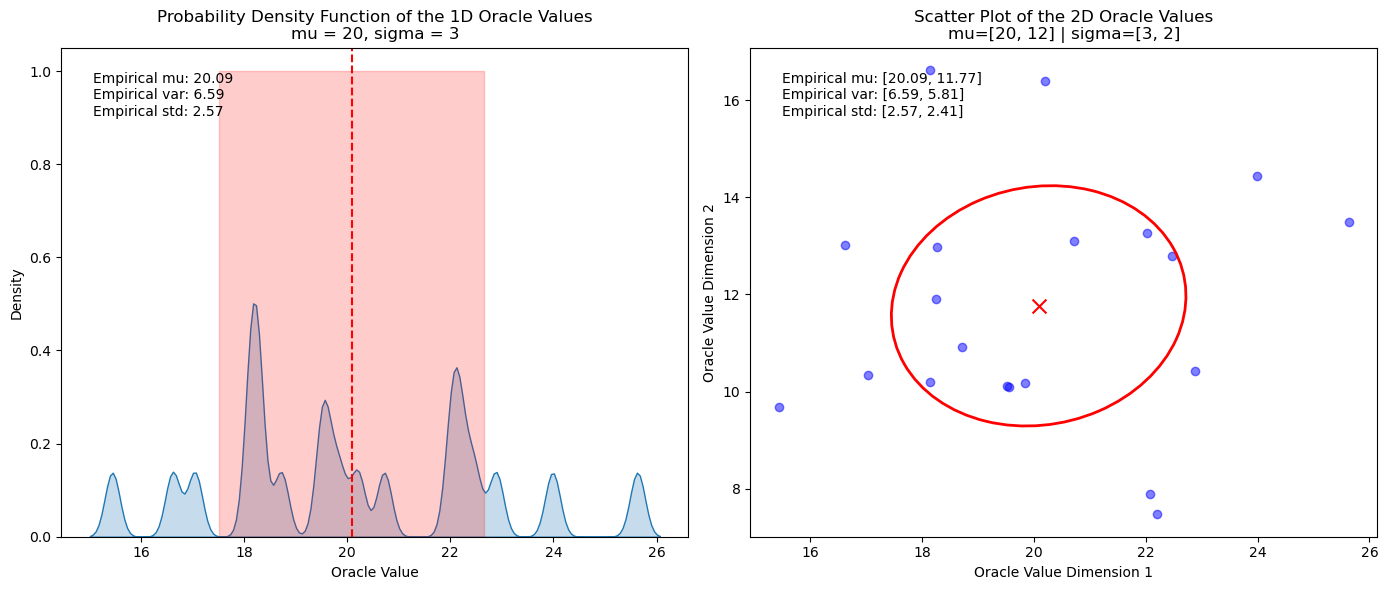

In [47]:
def plot():
    oracle_values = np.array(oracles_2d)[:, 0]
    oracle_values_2d = oracles_2d

    empirical_mu = np.mean(oracles_2d, axis=0)
    empirical_var = np.var(oracles_2d, axis=0)
    empirical_std = np.std(oracles_2d, axis=0)
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.kdeplot(oracle_values, bw_adjust=0.1, fill=True, ax=axs[0])
    axs[0].set_title(f'Probability Density Function of the 1D Oracle Values\nmu = {mu[0]}, sigma = {sigma[0]}')
    axs[0].set_xlabel('Oracle Value')
    axs[0].set_ylabel('Density')
    axs[0].annotate(f'Empirical mu: {empirical_mu[0]:.2f}\nEmpirical var: {empirical_var[0]:.2f}\nEmpirical std: {empirical_std[0]:.2f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top')
    axs[0].axvline(empirical_mu[0], color='r', linestyle='--')
    axs[0].fill_betweenx(np.linspace(0, 1, 100), empirical_mu[0] - empirical_std[0], empirical_mu[0] + empirical_std[0], color='r', alpha=0.2)

    axs[1].scatter(oracle_values_2d[:, 0], oracle_values_2d[:, 1], c='b', alpha=0.5)
    axs[1].set_title(f'Scatter Plot of the 2D Oracle Values\nmu={mu} | sigma={sigma}')
    axs[1].set_xlabel('Oracle Value Dimension 1')
    axs[1].set_ylabel('Oracle Value Dimension 2')
    axs[1].annotate(f'Empirical mu: [{empirical_mu[0]:.2f}, {empirical_mu[1]:.2f}]\nEmpirical var: [{empirical_var[0]:.2f}, {empirical_var[1]:.2f}]\nEmpirical std: [{empirical_std[0]:.2f}, {empirical_std[1]:.2f}]', 
                    xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top')
    
    # Adding the empirical mean and standard deviation ellipse
    cov = np.cov(oracle_values_2d, rowvar=False)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(empirical_mu[0], empirical_mu[1]),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='r', fc='None', lw=2)
    axs[1].add_patch(ell)
    axs[1].scatter(empirical_mu[0], empirical_mu[1], c='r', s=100, marker='x')
    
    plt.tight_layout()
    plt.show()

plot()

In [48]:
def to_wad(x : float) -> float:
    return int(x * 1e18)

In [49]:
def reliability(std : float) -> float :
    return 1 - 2*std

def expected_reliability(arr : np.array) -> float :
    a = np.abs(arr - np.median(arr))
    b = np.mean(a)

    return reliability(b)

In [51]:
print(f"first pass reliability approximation : {expected_reliability(oracles_2d):0.3f}")
for (x, y) in oracles_2d :
    print(f"array![{to_wad(x)}, {to_wad(y)}].span(), ") 

first pass reliability approximation : -7.438
array![20202804800890433536, 16401132114237284352].span(), 
array![25630344446076841984, 13501687730243987456].span(), 
array![22210028458728640512, 7472938283472651264].span(), 
array![18138928443303946240, 16619949381570797568].span(), 
array![19527275933443088384, 10116085583420502016].span(), 
array![22084988846100205568, 7901585917976843264].span(), 
array![19549281315874115584, 10104796416691441664].span(), 
array![17042861560438452224, 10343103521787559936].span(), 
array![20715973600052207616, 13098087743307982848].span(), 
array![22885973508821749760, 10415377474596722688].span(), 
array![18717628981156040704, 10909335620244258816].span(), 
array![16614914621277229056, 13016784356205508608].span(), 
array![22461185162366541824, 12790695160662409216].span(), 
array![19837245782601994240, 10175692692883621888].span(), 
array![18138521782884300800, 10192686820753297408].span(), 
array![22018233073020952576, 13257341164889929728].span(